In [1]:
import os
os.path.expanduser('~/.keras.models')
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [2]:
model = ResNet152(weights='imagenet')

In [3]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block6_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block8_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block4_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block10_1_relu[0][0]']   
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block13_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block13_1_relu[0][0]']   
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block13_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block16_1_relu[0][0]']   
                                                                                                  
 conv4_block16_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block16_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block22_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block22_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block22_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block22_1_relu[0][0]']   
                                                                                                  
 conv4_block22_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_2_conv[0][0]']   
 lization)

 conv4_block25_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block24_out[0][0]']      
                                                                                                  
 conv4_block25_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block25_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block25_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block25_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block27_out[0][0]']      
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block28_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block30_out[0][0]']      
                                                                                                  
 conv4_block31_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block31_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block33_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block34_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block33_out[0][0]']      
                                                                                                  
 conv4_block34_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block34_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block34_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block36_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block36_out[0][0]']      
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)       

                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         2049000     ['avg_pool[0][0]']               
                                                                                                  
Total params: 60,419,944
Trainable params: 60,268,520
Non-trainable params: 151,424
_________________________

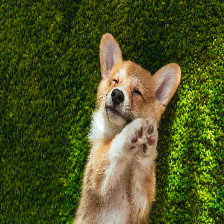

In [4]:
img = image.load_img('image.jpeg', target_size=(224, 224))
img

In [5]:
X = image.img_to_array(img)
X

array([[[32., 44.,  6.],
        [22., 39.,  5.],
        [54., 88.,  4.],
        ...,
        [16., 28.,  6.],
        [13., 24., 10.],
        [27., 50.,  8.]],

       [[37., 48., 16.],
        [38., 58.,  9.],
        [73., 90., 10.],
        ...,
        [14., 32.,  8.],
        [28., 49., 10.],
        [16., 41.,  1.]],

       [[35., 48.,  5.],
        [29., 47.,  7.],
        [28., 42.,  6.],
        ...,
        [18., 43.,  3.],
        [43., 74.,  0.],
        [53., 84.,  8.]],

       ...,

       [[27., 38.,  8.],
        [45., 67.,  5.],
        [51., 76.,  0.],
        ...,
        [40., 48.,  1.],
        [27., 40., 10.],
        [23., 36., 10.]],

       [[37., 51.,  0.],
        [38., 61.,  0.],
        [46., 68.,  4.],
        ...,
        [62., 67.,  1.],
        [57., 68.,  8.],
        [24., 38.,  2.]],

       [[47., 63.,  1.],
        [38., 58.,  9.],
        [19., 36.,  0.],
        ...,
        [31., 44.,  0.],
        [37., 60.,  0.],
        [39., 58.,  0.]]

In [6]:
np.shape(X)

(224, 224, 3)

In [7]:
X = np.expand_dims(X, axis=0)

In [8]:
np.shape(X)

(1, 224, 224, 3)

In [9]:
X = preprocess_input(X)
X

array([[[[ -97.939,  -72.779,  -91.68 ],
         [ -98.939,  -77.779, -101.68 ],
         [ -99.939,  -28.779,  -69.68 ],
         ...,
         [ -97.939,  -88.779, -107.68 ],
         [ -93.939,  -92.779, -110.68 ],
         [ -95.939,  -66.779,  -96.68 ]],

        [[ -87.939,  -68.779,  -86.68 ],
         [ -94.939,  -58.779,  -85.68 ],
         [ -93.939,  -26.779,  -50.68 ],
         ...,
         [ -95.939,  -84.779, -109.68 ],
         [ -93.939,  -67.779,  -95.68 ],
         [-102.939,  -75.779, -107.68 ]],

        [[ -98.939,  -68.779,  -88.68 ],
         [ -96.939,  -69.779,  -94.68 ],
         [ -97.939,  -74.779,  -95.68 ],
         ...,
         [-100.939,  -73.779, -105.68 ],
         [-103.939,  -42.779,  -80.68 ],
         [ -95.939,  -32.779,  -70.68 ]],

        ...,

        [[ -95.939,  -78.779,  -96.68 ],
         [ -98.939,  -49.779,  -78.68 ],
         [-103.939,  -40.779,  -72.68 ],
         ...,
         [-102.939,  -68.779,  -83.68 ],
         [ -93.939,  -

In [10]:
predictions = model.predict(X)

1/1 [==============================] - 7s 7s/step


In [11]:
predictions

array([[2.03979539e-06, 3.68120141e-07, 1.32578819e-08, 1.16011298e-08,
        2.18433360e-08, 4.91131686e-06, 8.49149089e-08, 4.38563205e-07,
        1.81621203e-06, 2.59281046e-06, 4.56818839e-07, 1.36617189e-06,
        4.16082102e-08, 1.79565077e-07, 1.10161018e-08, 2.86156450e-08,
        3.32445964e-08, 5.82650124e-08, 9.49542425e-07, 1.69616726e-07,
        9.41133749e-07, 2.10591633e-08, 2.40300544e-08, 1.46375646e-06,
        5.30422767e-07, 1.42324168e-07, 1.96849683e-07, 1.50733555e-07,
        4.12304473e-07, 3.63694710e-07, 2.03334608e-07, 4.87753232e-06,
        2.29006517e-07, 1.66768388e-09, 2.52288942e-07, 1.14796556e-07,
        9.13523479e-08, 4.46055601e-08, 1.44552757e-07, 2.38163711e-08,
        6.95029803e-06, 1.71838597e-08, 1.34897547e-07, 3.37442359e-08,
        7.75991253e-08, 6.09345108e-08, 1.21988041e-05, 1.88636659e-05,
        5.67230174e-09, 5.10661522e-08, 1.19887034e-07, 9.25731172e-07,
        6.72379258e-07, 2.78275962e-08, 4.95245693e-08, 2.076594

In [12]:
decode_predictions(predictions, top=1)[0][0][1]

'Pembroke'

In [16]:
capture = cv2.VideoCapture(0)
while (True):
    ref, frame = capture.read()
    frame = cv2.resize(frame, (224, 224))
    image = frame[..., ::-1]
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    predictions = model.predict(image)
    name = decode_predictions(predictions, top=1)[0][0][1]
    cv2.putText(frame, name, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 0))
    cv2.imshow('webcam', frame)
    if cv2.waitKey(1) == 13:
        break;
capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 386ms/step
